# Cursing and deaths in Tarantino movies - a visual representation

(in progress)

Tarantino movies are well known for a lot of reasons, but the ones we can all agree on are the crude violence and excessive profanity. In this project I'll use [Fivethirtyeight data on cursing and deaths in Tarantino movies](https://github.com/fivethirtyeight/data/tree/master/tarantino) to plot some nice charts and check if his fame is well deserved. This dataset contains information about each time someone died or cursed on Tarantino movies, from Reservoir Dogs to Django Unchained. 

First I'll import the data and do a little EDA (exploratory data analysis).

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('tarantino.csv')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
movie         1894 non-null object
type          1894 non-null object
word          1704 non-null object
minutes_in    1894 non-null float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [113]:
data.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


The first thing we can notice is that there are missing values in the _word_ column, which makes sense since there should only be a words when the _type_ value is _word_ and from this observation we can see that there are a lot more swear words than deaths.
The second thing is that the data doesn't have the year the movie was released. Even if I end up not using it later, I'll add it now.

In [114]:
print(data.movie.unique())
movies_map = {'Reservoir Dogs': 1992, 'Pulp Fiction': 1994, 'Kill Bill: Vol. 1':2003,
       'Kill Bill: Vol. 2':2004, 'Inglorious Basterds':2009, 'Django Unchained':2012,
       'Jackie Brown':1997} # Year data from wikipedia
data['year'] = data.movie.map(movies_map)

['Reservoir Dogs' 'Pulp Fiction' 'Kill Bill: Vol. 1' 'Kill Bill: Vol. 2'
 'Inglorious Basterds' 'Django Unchained' 'Jackie Brown']


In [115]:
data.sort_values(['year', 'minutes_in'], inplace=True)
data

,movie,type,word,minutes_in,year
0,Reservoir Dogs,word,dick,0.40,1992
1,Reservoir Dogs,word,dicks,0.43,1992
2,Reservoir Dogs,word,fucked,0.55,1992
3,Reservoir Dogs,word,fucking,0.61,1992
4,Reservoir Dogs,word,bullshit,0.61,1992
...,...,...,...,...,...
1517,Django Unchained,word,fucked,159.83,2012
1518,Django Unchained,word,n-word,159.88,2012
1519,Django Unchained,word,n-word,160.20,2012
1520,Django Unchained,word,ass,160.28,2012


In [116]:
types = data.type.unique()
words = data.word.unique()
print(types)
print(words)
print(data.word.value_counts()[data.word.value_counts() > 10])

['word' 'death']
['dick' 'dicks' 'fucked' 'fucking' 'bullshit' 'fuck' 'shit' 'motherfucker'
 'pussy' 'fucks' 'hell' 'jap' 'bastard' 'goddamn' 'motherfuckers'
 'asshole' 'ass' 'assholes' 'n-word ' 'asses' 'bitch' 'fuckup' 'fucker'
 'shitty' 'asshead' 'damn' nan 'damned' 'bitches' 'wetback' 'faggot'
 'cocksucker' 'gook' 'fuckers' 'gooks' 'motherfucking' 'dickless'
 'chickenshit' 'slope' 'fuckhead' 'merde' 'shittiest' 'shitload' 'dumbass'
 'shithead' 'cunt' 'cunts' 'fuckface' 'cockblockery' 'japs' 'jew (verb)'
 'bastards' 'horeshit' 'shitless' 'shitting' 'negro ' 'squaw' 'slut'
 'goddamned' 'jackass' 'horseshit']
fucking          407
shit             221
fuck             213
n-word           179
ass              140
goddamn          113
motherfucker      70
bitch             64
hell              45
damn              37
motherfucking     27
fucked            25
motherfuckers     15
bullshit          15
dick              14
pussy             11
Name: word, dtype: int64


A lot of the words have the same root word and a few are just the plural of another word on the list. To deal with these cases I'll count singular and plural of the same word as one word and I'll add boolean columns for each root word.

In [117]:
replace_map = {'dicks':'dick', 'fucks':'fuck', 'motherfuckers':'motherfucker', 'bastards':'bastard', 
               'assholes':'asshole', 'asses':'ass', 'bitches':'bitch', 'fuckers':'fucker', 'gooks':'gook', 
               'cunts':'cunt', 'goddamned':'goddamn', 'damned':'damn'}
data.replace(replace_map, inplace=True)
data.word.unique()

array(['dick', 'fucked', 'fucking', 'bullshit', 'fuck', 'shit',
       'motherfucker', 'pussy', 'hell', 'jap', 'bastard', 'goddamn',
       'asshole', 'ass', 'n-word ', 'bitch', 'fuckup', 'fucker', 'shitty',
       'asshead', 'damn', nan, 'wetback', 'faggot', 'cocksucker', 'gook',
       'motherfucking', 'dickless', 'chickenshit', 'slope', 'fuckhead',
       'merde', 'shittiest', 'shitload', 'dumbass', 'shithead', 'cunt',
       'fuckface', 'cockblockery', 'japs', 'jew (verb)', 'horeshit',
       'shitless', 'shitting', 'negro ', 'squaw', 'slut', 'jackass',
       'horseshit'], dtype=object)

In [118]:
import warnings
warnings.filterwarnings('ignore')

data.word.fillna('NaN', inplace=True)
data['fuck'] = ['fuck' in w for w in data.word]
data['ass'] = ['ass' in w for w in data.word]
data['shit'] = ['shit' in w for w in data.word]
racial = ['japs', 'jew (verb)', 'n-word ', 'negro']
data['racial'] = [w in racial for w in data.word]
data['death'] = [w == 'death' for w in data.type]
data['swearing'] = [w == 'word' for w in data.type]
data['other']=data.word
for i in range(len(data.word)):
    data['other'][i] = not( data.death[i]+data.fuck[i]+data.ass[i]+data.racial[i]+data.shit[i] )
    
data

,movie,type,word,minutes_in,year,fuck,ass,shit,racial,death,swearing,other
0,Reservoir Dogs,word,dick,0.40,1992,False,False,False,False,False,True,True
1,Reservoir Dogs,word,dick,0.43,1992,False,False,False,False,False,True,True
2,Reservoir Dogs,word,fucked,0.55,1992,True,False,False,False,False,True,False
3,Reservoir Dogs,word,fucking,0.61,1992,True,False,False,False,False,True,False
4,Reservoir Dogs,word,bullshit,0.61,1992,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1517,Django Unchained,word,fucked,159.83,2012,True,False,False,False,False,True,False
1518,Django Unchained,word,n-word,159.88,2012,False,False,False,True,False,True,False
1519,Django Unchained,word,n-word,160.20,2012,False,False,False,True,False,True,False
1520,Django Unchained,word,ass,160.28,2012,False,True,False,False,False,True,False


Now that the data looks like this, I'll start with a few plots. The next plot is just an overview of the swear words for each movie.

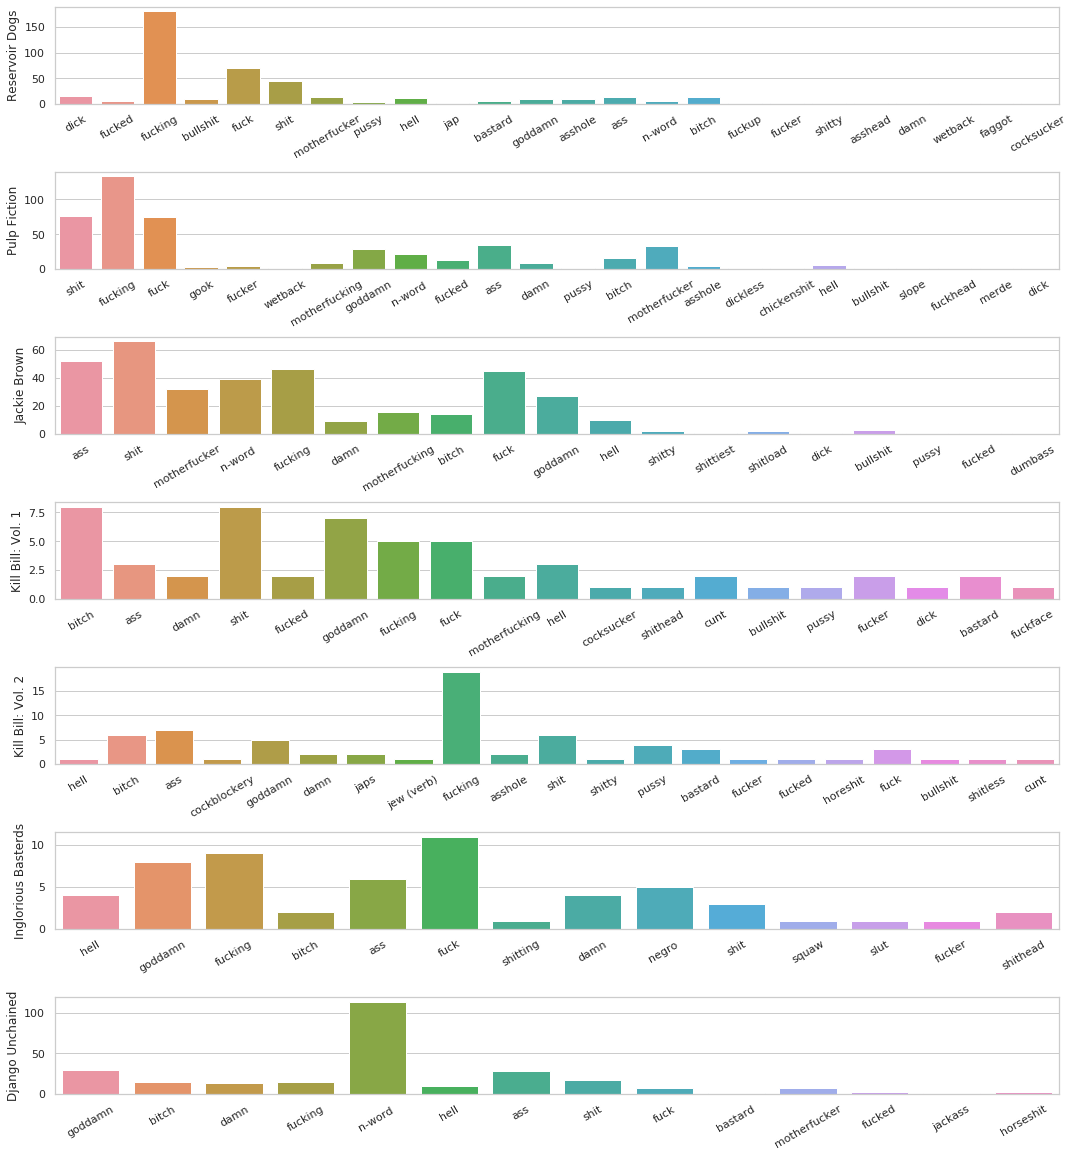

In [119]:
data.word.replace({'NaN':np.nan},inplace=True) # for plotting purposes
sns.set(style='whitegrid', context='notebook', palette='RdBu')
fig, m = plt.subplots(7, 1, figsize=(18, 20), sharex=False)
plt.subplots_adjust(hspace = 0.7)
movies = data.movie.unique()
x = [data.word[(data.movie == m)] for m in movies]
xa = data.word
for i in range(7):
    m[i] = sns.countplot(x=x[i], data=data, ax=m[i])
    m[i].set_xticklabels(m[i].get_xticklabels(), rotation=30)
    m[i].set_ylabel(movies[i])
    m[i].set_xlabel('')


Now I'll use the boolean columns I created earlier to make it easier to compare movies.

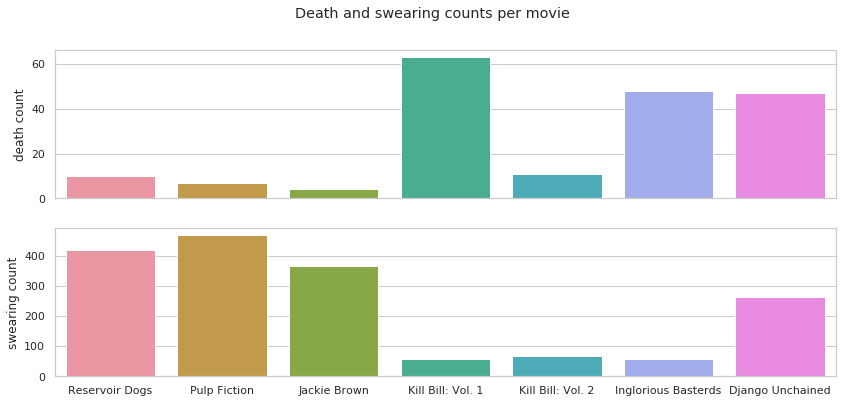

In [120]:
data_bool = data[['movie','fuck', 'ass', 'shit', 'racial', 'other', 'death', 'swearing']]

fig2, m2 = plt.subplots(2, 1, figsize=(14, 6), sharex=True)
fig2.suptitle('Death and swearing counts per movie')
#fig2.subplots_adjust(hspace = 0.3)
cols2 = ['death', 'swearing']
for i in range(2):
    m2[i] = sns.barplot(x='movie', y=cols2[i], data=data_bool, ax=m2[i], estimator=sum, ci=None)
    m2[i].set_ylabel(cols2[i]+' count')
    m2[i].set_xlabel('')


From the last plot we can tell that Tarantino's movies got the violence fame from Kill Bill: Vol. 1. We can also notice that after Jackie Brown he cut down on the profanity and increased the violence, with the exception of Kill Bill: Vol. 2. 

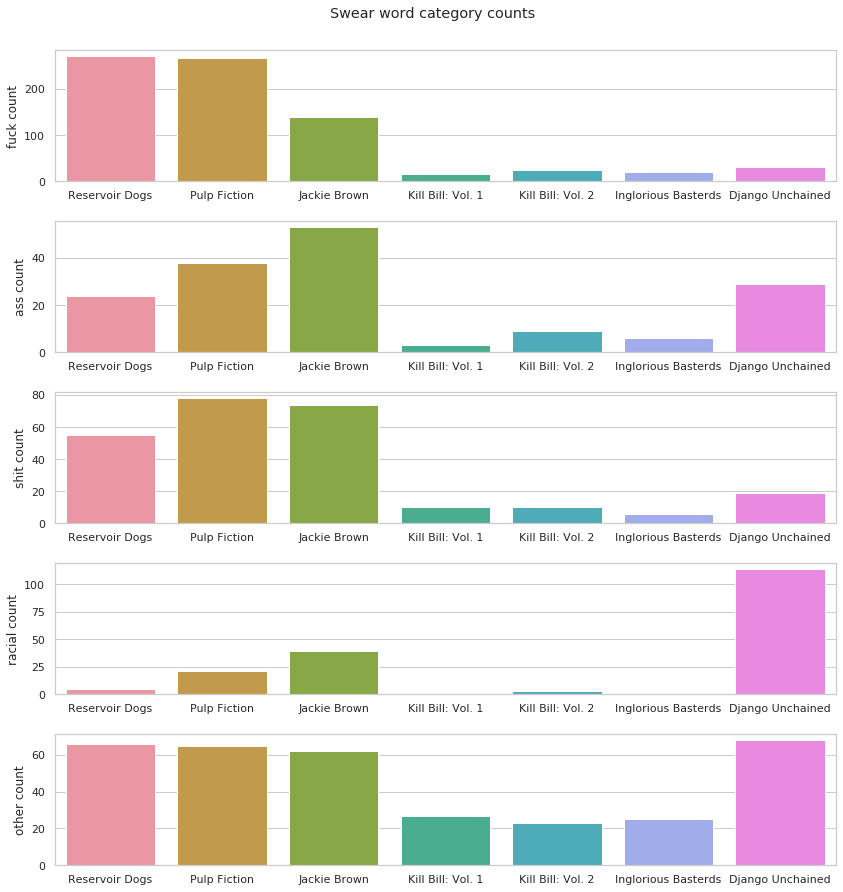

In [121]:
fig1, m1 = plt.subplots(5, 1, figsize=(14, 15), sharex=False)
fig1.suptitle('Swear word category counts', y=0.92)
cols = ['fuck', 'ass', 'shit', 'racial', 'other']
fig1.subplots_adjust(hspace = 0.3)
for i in range(5):
    m1[i] = sns.barplot(x='movie', y=cols[i], data=data_bool, ax=m1[i], estimator=sum, ci=None)
    m1[i].set_ylabel(cols[i]+' count')
    m1[i].set_xlabel('')


"Fuck" related words are the most commons by far and Django Unchained has the most racial slurs, Jackie Brown comes second with less than half racial slurs.

The data also has the minutes_in column, so I'll use it to see the number of deaths and profanity progress along the movies. 

Text(0.5, 0.92, 'Number of events (death or swearing) per minute of the movie')

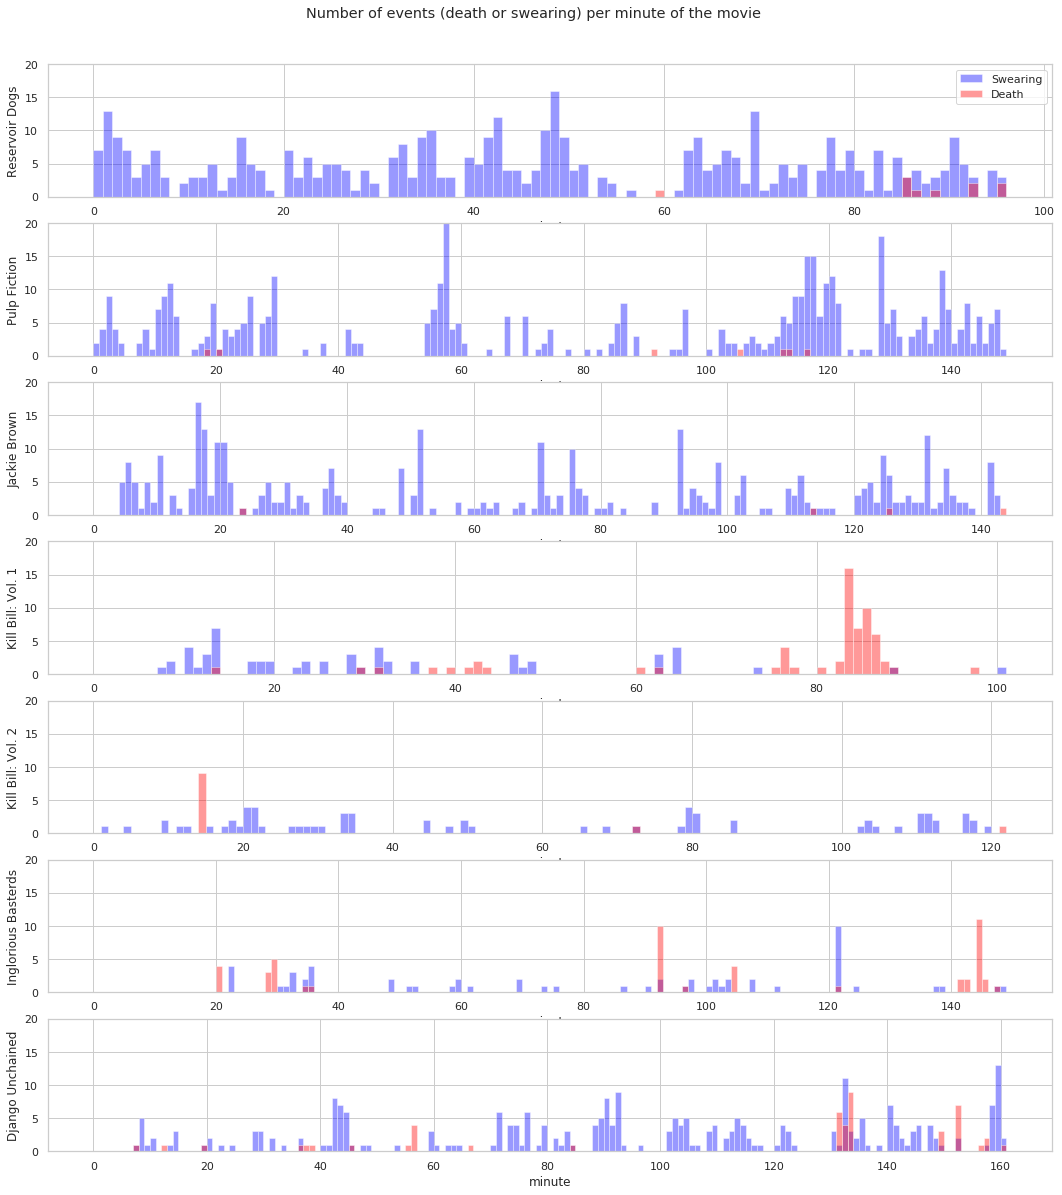

In [122]:
fig, m = plt.subplots(7, 1, figsize=(18, 20), sharex=False)
plt.subplots_adjust(hspace = 0.2)
movies = data.movie.unique()
dt_min = data[['minutes_in','movie', 'death']]
dt_min_word = dt_min[dt_min.death == False]
dt_min_death = dt_min[dt_min.death == True]
x = [dt_min_death.minutes_in[(dt_min_death.movie == m)] for m in movies]
z = [dt_min_word.minutes_in[(dt_min_word.movie == m)] for m in movies]
bins = [np.arange(0,int(np.ceil(max(dt_min.minutes_in[dt_min.movie == m])))+1,1) for m in movies]
for i in range(7):
    m[i] = sns.distplot(z[i], ax=m[i], bins=bins[i], kde=False, color='blue')
    m[i] = sns.distplot(x[i], ax=m[i], bins=bins[i], kde=False, color='red')
    m[i].set_ylabel(movies[i])
    m[i].set(ylim=(0,20))
    m[i].set_xlabel('minute')
m[0].legend(labels=['Swearing', 'Death'])
fig.suptitle('Number of events (death or swearing) per minute of the movie', y=0.92)


In most of these movies the number of deaths seems to increase at end, probably during its climax.

The next chart is the count of a event (death, cuss word, etc.) per minute of the movie, but this time we can choose which movie and event to plot. 

In [126]:
from ipywidgets import *

movies = list(data.movie.unique())
colors = [sns.xkcd_rgb['dark magenta'], sns.xkcd_rgb['greyish blue'], sns.xkcd_rgb['greenish blue'], 
          sns.xkcd_rgb['grey purple'], sns.xkcd_rgb['very dark green'], sns.xkcd_rgb['light navy'], 
          sns.xkcd_rgb['violet red'], sns.xkcd_rgb['lipstick'], sns.xkcd_rgb['dirty purple'], 
          sns.xkcd_rgb['orange yellow'], sns.xkcd_rgb['reddish'], sns.xkcd_rgb['dark salmon'], 
          sns.xkcd_rgb['burgundy'], sns.xkcd_rgb['crimson'], sns.xkcd_rgb['dark turquoise'], 
          sns.xkcd_rgb['very dark blue'], sns.xkcd_rgb['almost black'], sns.xkcd_rgb['dried blood'], 
          sns.xkcd_rgb['bruise'], sns.xkcd_rgb['dark hot pink']]
def plot_hist(mov, eve):
    fig, ax = plt.subplots(figsize=(16,5)) 
    dt_eve = data[(data[eve] == True)]
    dt_eve_mov = dt_eve.minutes_in[dt_eve.movie == mov]
    ind = movies.index(mov)
    b = bins[ind]
    color = np.random.choice(colors)
    ch = sns.distplot(dt_eve_mov, bins=b, kde=False, ax=ax, color=color)
    ch.set(xlabel='minute', ylabel=('count'))
    plt.title(mov)
    plt.show()
print('Choose the movie and the event (death, word...) to plot:')
interact(plot_hist, 
         eve=widgets.Dropdown(options=[('Deaths', 'death'), ('All swearing', 'swearing'), ('Swearing containing fuck', 'fuck'), 
                                       ('Swearing containing shit', 'shit'), ('Swearing containing ass', 'ass'), 
                                       ('Racial slurs','racial')],
                              description='Event:', disabled=False),
         mov=widgets.Dropdown(options=movies, 
                              description='Movie:', disabled=False)
        )


Choose the movie and the event (death, word...) to plot:


interactive(children=(Dropdown(description='Movie:', options=('Reservoir Dogs', 'Pulp Fiction', 'Jackie Brown'…

<function __main__.plot_hist(mov, eve)>